# Assignment - Visualization

Make sure to **read the instructions** completely. Failing to follow the instructions will have a negative impact on your grade!

In this assignment, we will explore ways to visualize the data, starting with simple plots for early exploration and build towards more interactive methods. As we want to go beyond static plots possible with for example matplotlib or seaborn, we will use the [Bokeh](https://www.bokeh.org/) library. This means the exercises **must** be implemented with Bokeh to receive points.

This assignment includes four parts (Assignmets V.1 to V.4) which provide different amounts of points. V.1 to V.3 are independent assignments, but V.4 builds on the previous assignments.
 
**Before you submit**, make sure that you are not accidentaly using any global variables. Restart the kernel (wiping all global variables) and run the code from top to bottom by clicking "Kernel" => "Restart & Run all" in the menu bar at the top.

### API documentation

note: you can find the used versions by checking the `environment.yml` file or `running conda list -n dsait4000vis` from the command line

* [Bokeh](https://docs.bokeh.org/) (also has examples)
* [Pandas](https://pandas.pydata.org/docs/)
* [NumPy](https://numpy.org/doc/stable/)
* [SciPy](https://docs.scipy.org/doc/scipy/)


### Rules
For this assignment the following rules apply:

**General**
 * The assignment should be completed in the **groups** you have already assembled for the previous assignment. Work together on all parts and do not distribute the work. Everyone is responsible for everything. That also means if there is fraud in a part it will be considered fraud by the whole group and voids the complete assignment, even if you distributed the parts of the assignment.
 * Any kind of intergroup discussion will be considered fraud and both the parties will be punished.
 * All code must be written within group. All external help, with the exception of Python/library documentation and the lecture slides, will be considered fraud.
 * Do not add any libarires to those already included notebook (i.e., `numpy`, `scipy`, `pandas`, and `bokeh`)
 * Add functionality from bokeh, like ```from bokeh.io import output_notebook```, on top of the block where you need it.
 * **Do not rename the notebook file**

**Grading**
 * Exercise may (partially) be graded automatically, using additional hidden tests. These tests will check your solution for different (unseen) inputs.
 * If these tests pass without error (warnings are allowed) then you receive full points.
 * Do not make any assumptions on the input data (such as number or type of columns) unless specified otherwise. Doing so may result in the tests failing and thus 0 points.
 * Your grade is calculated as the sum of the achieved points and will be rounded to the closest 0.1 point.
 
**Submissions**
 * Submit your code to Brightspace
 * For this assignment you must *only* submit the notebook (`*.ipynb`) file filled in with your solution.
 * Refer to Brightspace for the exact deadline.
 * We will consider submissions that are handed in up to 3 hourse after the deadline but with a penalty as follows:
 * For every completed 20 minutes past the deadline the grade will be reduced by 0.5 (e.g., with the deadline at 17:00, a submission at 17:19 will get the full grade, a submission at 17:20 will receive a 0.5 grade penalty.

In [22]:
# We do the basic setup here.
# Do not (!) change this cell! All changes will be reset during grading!

# numpy and pandas
import numpy as np
import pandas as pd

# We import a range of bokeh functionality that will likely be needed already
# if you need more, import it at the top of the corresponding cell
from bokeh.plotting import figure, gridplot, show
from bokeh.layouts import column
from bokeh.transform import factor_cmap, linear_cmap
from bokeh.models import ColumnDataSource, HoverTool, NumeralTickFormatter, BasicTicker, PrintfTickFormatter, CustomJS, Select, axes
from bokeh.models.annotations import Label
# from bokeh.io import output_notebook
# output_notebook() # activate Bokeh output to Jupyter notebook

# You can use this to calculate the density plot in Assignment V.3
from scipy.stats import gaussian_kde
from bokeh.io import output_file
# We load the adult data  (https://archive.ics.uci.edu/dataset/2/adult) as in previous assignments (note, we keep the headers, to use them in the pandas dataframe)
# Note: we do not change ? values to nan, but rather keep them as ? so they will be shown in the visualizations
data = pd.read_csv("datasets/Visualization/adult_all.csv")

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Assignment V.1 (5 points)
Getting an overview of the data distribution

In this first assignment, we want to use visualization to get a quick overview of the distribution of the different attributes/columns. This can often be helpful to make sure that we use models that match the distribution downstream or to quickly identify for example whether the data is distributed over all classes equally if the attribute is intended to be used for training a model.

A good way to quickly plot the distribution is a simple bar chart for the column. However, this will only allow us to look at one attribute at a time. In class we have discussed small multiples. We can use this concept to plot all attributes in a grid of plot. 

For this assignment do the following:
* create a grid of bar charts, with one chart per column in the dataset. The attribute values shall be on the x-axis and the count of each value on the y-axis. Look at pandas `value_counts` function to get the latter.
  Hint: The `figure()` function works slightly different for numerical and categirucal data.
* make sure that the charts and axes are well labeled (for example like in the screenshot below). It will be hard to properly label the x-axis with many items (e.g., native-country). Do this as good as you can, you will likely not find a perfect solution for all attributes.
* add a tooltip to show the values on hover (see the education chart, top-right, in the image below)

The result should look similar to the below.

[<img src="assets/barcharts.png" alt="Small Multiples showing the distributions of all columns in the dataset." width="500"/>](assets/barcharts.png)

In [23]:
# Define categorical columns
categorical_columns = ['workclass', 'education', 'marital-status', 
                       'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [24]:
def cat_bar(data, column_name):
    labels = data[column_name].value_counts().index.tolist()
    counts = data[column_name].value_counts().values.tolist()
    
    source = ColumnDataSource(data=dict(labels=labels, counts=counts))
    
    p = figure(x_range=labels, height=350, title=column_name,
              toolbar_location=None, tools="")
    
    p.vbar(x='labels', top='counts', width=0.9, source=source)
    
    hover = HoverTool()
    hover.tooltips = [("Category", "@labels"), ("Count", "@counts")]
    p.add_tools(hover)
    
    p.axis.major_label_orientation = 0.7
    
    return p

In [25]:
def num_bar(data, column_name):
    values = data[column_name].value_counts().index
    counts = data[column_name].value_counts().values
    
    source = ColumnDataSource(data=dict(values=values, counts=counts))
    
    p = figure(height=350, title=column_name,
              toolbar_location=None, tools="")
    
    p.vbar(x='values', top='counts', width=0.9, source=source)
    
    hover = HoverTool()
    hover.tooltips = [("Value", "@values"), ("Count", "@counts")]
    p.add_tools(hover)
    
    p.xaxis.major_label_orientation = 0.7
    
    return p

In [26]:
plots = []

for col in categorical_columns:
    plots.append(cat_bar(data, col))

for col in numerical_columns:
    plots.append(num_bar(data, col))

ncols = 3
grid = gridplot([plots[i:i+ncols] for i in range(0, len(plots), ncols)])

show(grid)

### Assignment V.2 (5 points)

Getting an overview of possible correlations and some interactivity.

To keep this simply we only use the numerical variables here. You can use pandas `corr()` [function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) directly on the dataframe using the `numeric_only = True` argument. The output will contain only the results from using numerical columns. It should be noted though, that there are also ways to calculate dependencies or correlation between catagorical (e.g., [Chi-Square_test](https://en.wikipedia.org/wiki/Chi-square_test), [Cramér's V](https://en.wikipedia.org/wiki/Cramér%27s_V)) or categorical and numerical (e.g., [One-way ANOVA test](https://en.wikipedia.org/wiki/F-test#One-way_ANOVA_example)) values.

The output will be a matrix if pairwise correlations. It is common, to visualize such data in a heatmap (images below).

* Calculate the correlation of the numerical columns using pandas `corr()`, using Pearson correlation (this is the default of the function).
* Create a heatmap showing the values. The data format output by `corr()` might not be very useful. Look for example at [pandas `stack()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html) for possible ways to transforma the data into a typical dataframe.
* A heatmap uses x and y position for the attributes and color for the value, choose a fitting colormap and **justify it below in 50 words or less**. (Note: the color chosen in the example below might or might not be good. Do **not** use the example to justify your choice.)
* Make sure the chart is legible by adding axes, legends, a color bar, or similar. It is up to you to decide what is needed.

We have now visualized one possible correlation. We want to extend our chart to be able to switch between the Pearson and Spearman correlation interactively using a dropdown menu directly in the chart.
* Add a `Select` dropdown with the two options.
* Calculate both correlation values and add a plot for each to your figure.
* Use `js_on_change` on the added Select to add code to switch between the two plot

[<img src="assets/heatmap.png" alt="Heatmap showing correlations" width="500"/>](assets/heatmap.png)
[<img src="assets/heatmap_select.png" alt="Heatmap showing correlations with open selection widget" width="500"/>](assets/heatmap_select.png)

In [54]:
import numpy as np

from bokeh.io import show, output_notebook
from bokeh.models import Select, CustomJS, ColumnDataSource, ColorBar
from bokeh.layouts import column

from bokeh.palettes import Magma256
from bokeh.palettes import Plasma256


correlation_matrices = {
    "pearson": data.corr(numeric_only=True, method="pearson"),
    "spearman": data.corr(numeric_only=True, method="spearman")
}


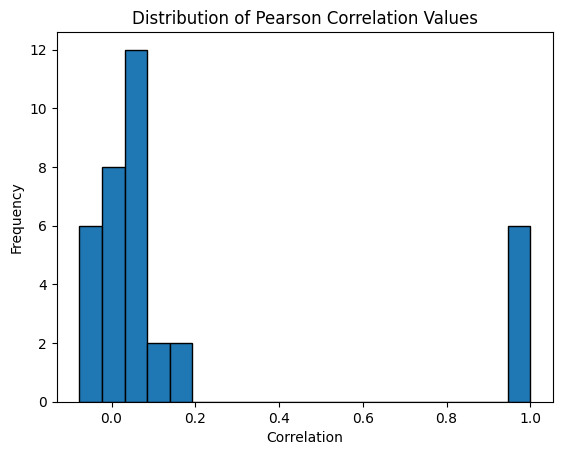

In [45]:
#deterimine distribution of correlation
import matplotlib.pyplot as plt

correlation_values = correlation_matrices['pearson'].values.flatten()

plt.hist(correlation_values, bins=20, edgecolor='black')
plt.title("Distribution of Pearson Correlation Values")
plt.xlabel("Correlation")
plt.ylabel("Frequency")
plt.show()


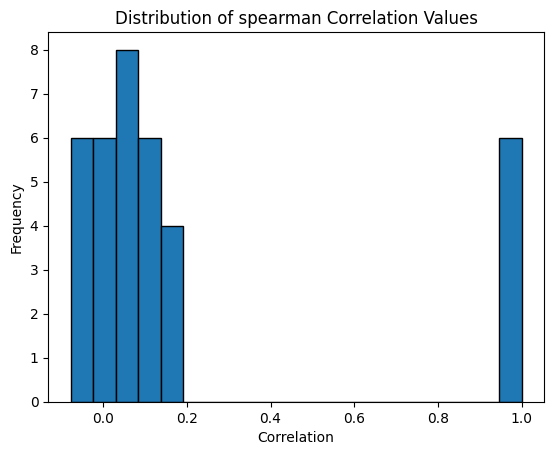

In [55]:
correlation_values = correlation_matrices['spearman'].values.flatten()

plt.hist(correlation_values, bins=20, edgecolor='black')
plt.title("Distribution of spearman Correlation Values")
plt.xlabel("Correlation")
plt.ylabel("Frequency")
plt.show()

In [56]:

def get_heatmap_data(corr_matrix):
    corr_stack = corr_matrix.stack().reset_index()
    corr_stack.columns = ['Variable 1', 'Variable 2', 'Correlation']
    return corr_stack

def create_heatmap(corr_matrix):
    corr_matrix.columns = corr_matrix.columns.astype(str)
    corr_matrix.index = corr_matrix.index.astype(str)
    
    heatmap_data = get_heatmap_data(corr_matrix)
    
    source = ColumnDataSource(heatmap_data)
    
    mapper = LinearColorMapper(palette=Plasma256, low=-0.3, high=0.3)

    p = figure(
        title="Correlation Heatmap", 
        x_range=list(corr_matrix.columns),  
        y_range=list(reversed(corr_matrix.index)),  
        toolbar_location=None, 
        tools=""
    )
    
    p.rect(
        x="Variable 1", 
        y="Variable 2", 
        width=1, 
        height=1, 
        source=source, 
        fill_color={'field': 'Correlation', 'transform': mapper}, 
        line_color=None
    )
    
    color_bar = ColorBar(color_mapper=mapper, location=(0, 0), title="Correlation")
    p.add_layout(color_bar, 'right')
    # Add hover tool to display exact correlation values
    hover = HoverTool(
        tooltips=[
            ("Variable 1", "@{Variable 1}"),
            ("Variable 2", "@{Variable 2}"),
            ("Correlation", "@Correlation{0.2f}")  # Shows the correlation with 2 decimal places
        ]
    )
    p.add_tools(hover)
    p.xaxis.axis_label = "Variables"
    p.yaxis.axis_label = "Variables"
    p.xaxis.major_label_orientation = "vertical"
    p.yaxis.major_label_orientation = "horizontal"
    return p




In [57]:
pearson_heatmap = create_heatmap(correlation_matrices['pearson'])
spearman_heatmap = create_heatmap(correlation_matrices['spearman'])

select = Select(title="Correlation Method", value="pearson", options=["pearson", "spearman"])

#dropdown
callback = CustomJS(args=dict(pearson=pearson_heatmap, spearman=spearman_heatmap), code="""
    var value = cb_obj.value;
    
    if (value === 'pearson') {
        pearson.visible = true;
        spearman.visible = false;
    } else {
        pearson.visible = false;
        spearman.visible = true;
    }
""")

select.js_on_change('value', callback)


In [58]:
pearson_heatmap.visible = True
spearman_heatmap.visible = False

layout = column(select, pearson_heatmap, spearman_heatmap)
output_notebook()
from bokeh.io import output_file
output_file("bokeh_plot.html")
show(layout)

Loading BokehJS ...

#### Response: Justification for colormap
**_Add your justification for the choice of colormap below._**

YOUR ANSWER HERE

### Assignment V.3 (5 points)

Correlation in detail.

Pick the any two numerical and one categorical column from the dataset. We already extract the names of the first two numerical and first categorical columns below, the easiest is to just use those. You can make these also user-selectable like in the previous assignment, but you do not have to for this assignment. (Remenber that we might test this with a different dataset, so do not pick by name.)

The goal here is to visualize the complete data of the selected columns to get more detail on the correlation. We will proceed in two steps again.

In the first step, create a scatterplot to visualize the selected columns.
* A scatterplot is a common representation, bokeh provides it using `scatter`.
* Use the x and y axes for the numerical values.
* Choose a proper encoding for the categorical column and  **justify** it in the field below the code **in 50 words or less**. (Note: this encoding was omitted in the example figure below.)
* Make sure the chart is legible by adjusting mark sizes, adding axes, legends, a color bar, or similar, etc. It is up to you to decide what is needed.

Even with putting in a lot of effort, you will notice that there will be a lot of overplotting, even with 'just' ~50k points in the dataset. In the example below, you see iso-density lines added to show how the points distribute. We have already added the `kde` function to [estimate the density.](https://en.wikipedia.org/wiki/Multivariate_kernel_density_estimation) Use this to calculate the point density. This is taken from an [example in the Bokeh documenation](https://docs.bokeh.org/en/latest/docs/examples/topics/stats/kde2d.html). Look at the [example](https://docs.bokeh.org/en/latest/docs/examples/topics/stats/kde2d.html) and adjust it to your needs.
* Add the density information to your plot.

[<img src="assets/scatterplot.png" alt="Scatterplot with density indicator" width="700"/>](assets/scatterplot.png)

In [30]:
# kde calculation taken from https://docs.bokeh.org/en/latest/docs/examples/topics/stats/kde2d.html
# look at the example on how it is used. You can use the plot code also for inspiration, but make sure to adjust it for proper results
# note, N is the kernel size, larger values will make this lengthy to calculate but give more smooth results.
# When you use it consider using small values for N during testing.
def kde(x, y, N):
    
    xmin, xmax = x.min(), x.max()
    ymin, ymax = y.min(), y.max()

    X, Y = np.mgrid[xmin:xmax:N*1j, ymin:ymax:N*1j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([x, y])
    kernel = gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)

    return X, Y, Z

# we extract the names of the first two numerical columns
num_cols = []
num_cols.append(data.select_dtypes(include="number").columns[0])
num_cols.append(data.select_dtypes(include="number").columns[1])
# and the first categorical column.
cat_col = data.select_dtypes(include=["object", "category"]).columns[0]
# You can just use the above columns to set up your visualization. Feel free to change these for testing.
# For the submission, you can safely assume that at least 2 numerical and 1 categorical columns are available in the dataset.

# YOUR CODE HERE, see below

## Option 1

In [31]:
from bokeh.palettes import Blues9
from bokeh.models import TabPanel, Tabs, NumeralTickFormatter, LinearColorMapper
from bokeh.models.layouts import Row
from bokeh.plotting import figure, show

x = data[num_cols[0]]
y = data[num_cols[1]]
data_fillNa = data.copy()
data_fillNa[cat_col] = data_fillNa[cat_col].fillna('Unknown')
categories = data_fillNa[cat_col].unique().astype(str)

X, Y, Z = kde(x, y, N=50)
x_range = (X.min(), X.max())
y_range = (Y.min(), Y.max())
z_min, z_max = np.min(Z), np.max(Z)

color_mapper = LinearColorMapper(palette=Blues9[::-1], low=z_min, high=z_max)

tabs = []

for category in categories:
    data_filtered = data_fillNa[data_fillNa[cat_col] == category]
    x_dataFiltered = data_filtered[num_cols[0]]
    y_dataFiltered = data_filtered[num_cols[1]]
    X, Y, Z = kde(x_dataFiltered, y_dataFiltered, N=50)

    p = figure(height=400, x_axis_label=num_cols[0], y_axis_label=num_cols[1],
               background_fill_color="#fafafa", tools="", toolbar_location=None,
               title=f'Scatterplot for {num_cols[0]}, {num_cols[1]} (Filtered: {category})',
               x_range=x_range, y_range=y_range)
    p.grid.level = "overlay"
    p.grid.grid_line_color = "black"
    p.grid.grid_line_alpha = 0.05
    p.yaxis.formatter = NumeralTickFormatter(format="0,0")
    
    levels = np.linspace(z_min, z_max*1.1, 10)
    palette = Blues9[::-1]
    p.contour(X, Y, Z, levels[1:], fill_color=palette, line_color=palette)
    # p.contour(X, Y, Z, levels[1:], fill_color=color_mapper, line_color='black')

    # Add color bar
    # color_bar = ColorBar(color_mapper=color_mapper, width=8, location=(0,0))
    # p.add_layout(color_bar, 'right')  # Place the color bar to the right of the plot

    tabs.append(TabPanel(child=p, title=category))

tabs0 = Tabs(tabs=tabs)

show(Row(tabs0))

## Option 2

In [32]:
from bokeh.models import CustomJS
from bokeh.plotting import figure, show
from bokeh.models import LegendItem
from bokeh.palettes import Category10, Category20, Turbo256
from bokeh.models import NumeralTickFormatter
import numpy as np
import pandas as pd

x = data[num_cols[0]]
y = data[num_cols[1]]
data_fillNa = data.copy()
data_fillNa[cat_col] = data_fillNa[cat_col].fillna('Unknown')
categories = data_fillNa[cat_col].unique().astype(str)

n_categories = len(categories)

if n_categories <= 10:
    palettes = Category10[n_categories]
elif n_categories <= 20:
    palettes = Category20[n_categories]
else:
    palettes = Turbo256[:n_categories]

X, Y, Z = kde(x, y, N=50)
x_range = (X.min(), X.max())
y_range = (Y.min(), Y.max())
z_min, z_max = np.min(Z), np.max(Z)

p = figure(height=400, x_axis_label=num_cols[0], y_axis_label=num_cols[1],
               background_fill_color="#fafafa", tools="", toolbar_location=None,
               title=f'Scatterplot for {num_cols[0]}, {num_cols[1]}',
               x_range=x_range, y_range=y_range)
p.grid.level = "overlay"
p.grid.grid_line_color = "black"
p.grid.grid_line_alpha = 0.05
p.yaxis.formatter = NumeralTickFormatter(format="0,0")

def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return np.array([int(hex_color[i:i + 2], 16) / 255.0 for i in (0, 2, 4)])

def generate_palette(base_color_hex, num_levels=10):
    base_rgb = hex_to_rgb(base_color_hex)
    lighter_colors = np.linspace([1, 1, 1], base_rgb, num_levels // 2, endpoint=False)
    darker_colors = np.linspace(base_rgb, [0, 0, 0], num_levels // 2 + 1)[1:]  # Avoid duplicate middle color
    return np.vstack((lighter_colors, darker_colors))

legend_items = []

for idx, category in enumerate(categories):
    data_filtered = data_fillNa[data_fillNa[cat_col] == category]
    x_dataFiltered = data_filtered[num_cols[0]]
    y_dataFiltered = data_filtered[num_cols[1]]
    X, Y, Z = kde(x_dataFiltered, y_dataFiltered, N=50)
    levels = np.linspace(z_min, z_max * 1.1, 10)[1:]
    base_color = palettes[idx]
    palette = generate_palette(base_color, len(levels))
    
    contour = p.contour(X, Y, Z, levels=levels, fill_color=palette, line_color=palette, fill_alpha=0.3, line_alpha=0.5)

    color_patch = p.rect(x=0, y=0, width=1, height=1, color=base_color, alpha=0.6, legend_label=category)
    
    callback = CustomJS(args=dict(contour=contour), code="""
        contour.visible = !contour.visible;
    """)
    
    color_patch.js_on_change('visible', callback)

    legend_item = LegendItem(label=category, renderers=[color_patch])
    legend_items.append(legend_item)

p.legend.items = legend_items 
p.legend.location = "center_right"
p.legend.orientation = "vertical"
p.legend.title = "Categories"
p.legend.title_text_font_style = "bold"
p.legend.label_text_font_size = "8pt"
p.legend.margin = 10
p.legend.padding = 10
p.legend.click_policy = "hide"

leg = p.legend[0]
p.add_layout(leg,'right')

show(p)

#### Response: Justification for categorical data encoding
**_Add your justification for the choice of encoding here!_**

YOUR ANSWER HERE

### Assignment V.4 (10 points)

Interactive exploration

In this final assignment we want to do some true interactive exploration harnessing the power of Bokeh. This might allow us to identify patterns related to specific subsets of the data.
You have two options to proceed, based on your previous results. The below descriptions are minimal solutions, feel free to go beyond the suggested functionality, if you deem it useful=. If you do so add a brief list of what you added in the textfield below.

#### Pick one of the the following options:

1. Use the result of **Assignment V.1** and extend it such that you can explore subsets of the data based on selection in one of the histograms. I.e.,
   * Make it possible to select any subset of the data by clicking the corresponding bar in any of the bar chart. E.g., clicking on the *Bachelors* bar in the *Education* chart should select all datapoints, where the value of Education is Bachelors.
   * highlight the selection in all charts (while keeping the full dataset). E.g., render a second bar corresponding to the fraction of the corresponding points with in a different color on top of the original bar.
<br/><br/>
2. Combine the results of **Assignment V.2** and **Assignment V.3** to an interactive overview+detail plot and allow filtering the scatterplot to show only selected categories of the categorical column.
   * Show both plots next to each other in a grid.
   * Allow seleciton of the numerical columns in the scatterplot by clicking on a cell in the heatmap.
   * Allow selection of the categorical column (e.g., by a dropdown, as in Assignment V.2).
   * Add a way to select one or multiple values of the categorical coloumn and filter the scatterplot based on those. E.g., Plot only the datapoints where *Education* equals *Bachelors*, when Education is selected as the categorical variable of the plot.

#### Some possibly useful hints:
* Check out **TapTool** for more information on enabling clicking events on plots
* Have a look at **CDSView** for one possible way to filter out a subset of data on a plot
* [Enabling click callbacks on bars](https://docs.bokeh.org/en/2.4.3/docs/user_guide/tools.html#setting-the-active-tools)
* [Getting clicked bar index in callback functions](https://discourse.bokeh.org/t/a-different-plot-in-another-figure-when-a-bar-of-a-barchart-is-clicked/8572/2)
* m[Apply hover tools to plots](https://stackoverflow.com/questions/29435200/bokeh-plotting-enable-tooltips-for-only-some-glyphs)

In [33]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

YOUR ANSWER HERE